In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from pathlib import Path

In [65]:
path_src_dataset = Path("./data/cleaned/cleaned_df.csv")

df = pd.read_csv(path_src_dataset)

# Data Exploring

### Categorical Data

In [69]:
categorical_var = df.select_dtypes(include=["object"]).columns.to_list()

# TODO
num_categorical_var = ["key","mode","time_signature"] # Add numerical data but with a categorical meaning (ex: color of car  => red=0, blue=1, green=2)
categorical_var.extend(num_categorical_var)

# Number of unique values per variable
df[categorical_var].nunique()

track_id          5845
artists           2424
album_name        2678
track_name        4205
explicit             2
track_genre          6
key                 12
mode                 2
time_signature       5
dtype: int64

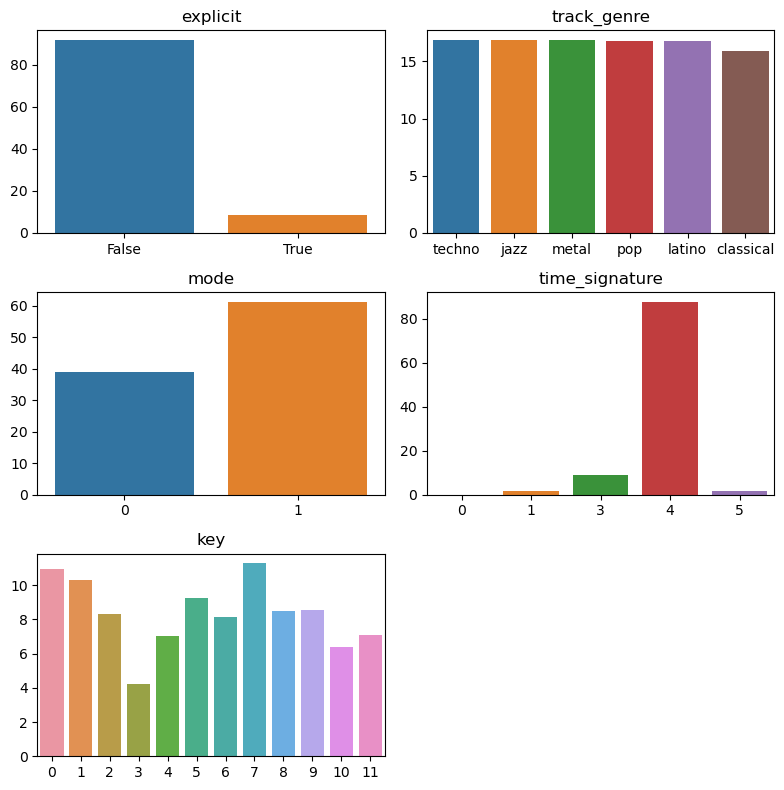

In [70]:
# TODO
categorical_var_to_plot = ["explicit","track_genre","mode","time_signature","key"]

df_barplot = df[categorical_var_to_plot]
# Create barplot with frequency for each variable
plt.figure(figsize=(8,8))

for c,var in enumerate(df_barplot.columns):
  # compute frequency of each unique value
  df_plot = df_barplot[var].value_counts(normalize=True).to_frame("frequency").reset_index(names=var)
  df_plot["frequency"] = df_plot["frequency"]*100

  # plot the barplot
  plt.subplot(3,2,c+1)
  sns.barplot(data=df_plot, x=var, y="frequency")
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

### Continuous Data

In [ ]:
continuous_var = df.drop(columns=categorical_var).columns.to_list()

# compute the summary statistics
df[continuous_var].describe().round(2)

In [ ]:
continuous_var = df.drop(columns=categorical_var).columns.to_list()

plt.figure(figsize=(10,12))

for c,var in enumerate(continuous_var):
  plt.subplot(6,2,c+1)
  sns.kdeplot(data=df[continuous_var], x=var, fill=var)
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

#### Detect Outliers with box plot

In [ ]:
# Create boxplots for continuous variables without a defined range
continuous_var_other = ["popularity","duration_ms","loudness","tempo"]

plt.figure(figsize=(8,6))
for c,var in enumerate(continuous_var_other):
  plt.subplot(2,2,c+1)
  ax = sns.boxplot(data=df[continuous_var_other], y=var)
  ax.ticklabel_format(style='plain', axis='y')
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

### Correlation Between Features

#### Categoriacal VS Contiuous

In [ ]:
# TODO
variable1 = "energy" # Continuous variable
variable2 = "track_genre" # Categorical variable. Can be target if target is a categorical variable

sns.kdeplot(data=df, x=variable1, hue=variable2, fill=variable2)
plt.tight_layout()

#### Continuous VS Contiuous

In [ ]:
# High correlation if correlation > 0.8

variables = continuous_var

plt.figure(figsize=(8,6))
sns.heatmap(df[variables].corr().abs(),annot=True)
plt.show()

#### Categorical VS Categorical

In [ ]:
# # TODO
# variable1 = "track_genre"
# variable1_value = "classical"

# variable2 = "explicit"
# variable2_value_1 = True
# variable2_value_2 = False



# # create dataframe to count track_genre/mode
# df_genre_explicit = df[[variable1, variable2]].value_counts().to_frame("count").reset_index()

# # add row for classifical genre with track_genre = True (frequency=0)
# val1_varval2 = {variable1:variable1_value, variable2:variable2_value, "count":0}
# df_genre_explicit = pd.concat([df_genre_explicit, pd.DataFrame([val1_varval2])], ignore_index=True)

# # create barplots
# bar1 = sns.barplot(data=df[variable1].value_counts().to_frame("count").reset_index(names=variable1), x=variable1, y="count", color='lightblue');
# bar2 = sns.barplot(data=df_genre_explicit.loc[df_genre_explicit[variable2]==True], x=variable1, y="count", color='darkblue',);

# # add legends
# bottom_bar = mpatches.Patch(color='darkblue', label=f'{variable2} = {variable2_value}')
# top_bar = mpatches.Patch(color='lightblue', label=f'{variable2} = not()')
# plt.legend(handles=[top_bar, bottom_bar])

# plt.show()